Following Mandal and Huo in their J. Phys. Chem. Lett. paper [here](https://pubs.acs.org/doi/abs/10.1021/acs.jpclett.9b01599), we will define the polariton Hamiltonian as follows:

\begin{equation}
\hat{H}_{pl} = \hat{H}_{el} + \hat{H}_p + \hat{H}_{el,p}
\end{equation}

where $\hat{H}_e$ denotes the electronic Hamiltonian:
\begin{equation}
\hat{H}_{el} = E_g(R) \: \hat{a}^{\dagger}_g \hat{a}_g + E_e(R) \: \hat{a}^{\dagger}_e \hat{a}_e,
\end{equation}
where $E_g(R)$ ($E_e(R)$) denotes the ground- (excited-) state electronic energy at nuclear coordinate $R$, and
$\hat{a}^{\dagger}_p$ ($\hat{a}_p$) are the creation (annihilation) operators for electronic state $p$.
The following matrix elements are equal to 1 using these operators and the basis states spanning $|g\rangle , |e\rangle$.
\begin{align}
\langle g | \hat{a}^{\dagger}_g \hat{a}_g | g \rangle = 1 \\
\langle e | \hat{a}^{\dagger}_e \hat{a}_e | e \rangle = 1 \\
\langle g | \hat{a}^{\dagger}_g \hat{a}_e | e \rangle = 1 \\
\langle e | \hat{a}^{\dagger}_e \hat{a}_g | g \rangle = 1; 
\end{align}
all other are zero.


The photon Hamiltonian is 
\begin{equation}
\hat{H}_p = \hbar \omega_c \left(\hat{b}^{\dagger} \hat{b} + \frac{1}{2}  \right),
\end{equation}
where $\hat{b}^{\dagger}$ and $\hat{b}$ denote the raising/lowering operators for the photon states, respectively.
The raising operator has the general effect on the basis states $|n\rangle$,
\begin{equation}
\hat{b}^{\dagger} |n\rangle = \sqrt{n+1} |n+1\rangle,
\end{equation}
while the lowering operator has the general effect
\begin{equation}
\hat{b} |n\rangle = \sqrt{n} |n-1\rangle;
\end{equation}
importantly, $\hat{b} |0\rangle  = 0$.  Both the photon and the electronic basis states form an orthonormal 
set, such that
\begin{equation}
\langle i | j \rangle = \delta_{ij}.
\end{equation}

Following Eq. S2 from Mandal and Huo, we compute $E_g(R)$ and $E_e(R)$ using the following code (see S2 in [this document](https://pubs.acs.org/doi/suppl/10.1021/acs.jpclett.9b01599/suppl_file/jz9b01599_si_001.pdf) for explicit equations):

In [2]:
import numpy as np
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt

### Function to return the ground and excited-state electronic energy as a function of
### the nuclear coordinate $R$
def E_of_R(R):
    Ai = np.array([0.049244, 0.010657, 0.428129, 0.373005])
    Bi = np.array([0.18, 0.18, 0.18, 0.147])
    Ri = np.array([-0.75, 0.85, -1.15, 1.25])
    Di = np.array([0.073, 0.514])
    
    v = Ai + Bi*(R - Ri)**2
    
    Eg = 0.5*(v[0] + v[1]) - np.sqrt(Di[0]**2 + 0.25 * (v[0] - v[1])**2)
    Ee = 0.5*(v[2] + v[3]) - np.sqrt(Di[1]**2 + 0.25 * (v[2] - v[3])**2)
    return [Eg, Ee]
    

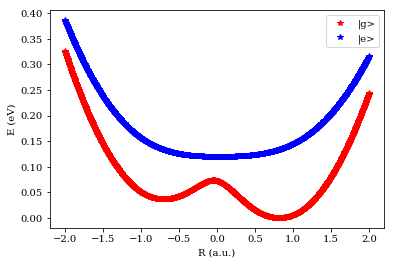

In [3]:
### Code to run E_of_R function for a variety of values of R between -1.5 and 1.5 atomic units
### and plot the energy in electron volts for the ground- and excited-state surface, 
### giving the plot from Figure 2 of Mandal and Huo's paper
rlist = np.linspace(-2.0, 2.0, 1000)

E_ground = []
E_excite = []
for r in rlist:
    PES = E_of_R(r)
    E_ground.append(PES[0])
    E_excite.append(PES[1])
    
plt.plot(rlist, E_ground, 'r*', label='|g>')
plt.plot(rlist, E_excite, 'b*', label='|e>')
plt.xlabel("R (a.u.)")
plt.ylabel("E (eV)")
plt.legend()
plt.show()

The contribution from photons and photon-molecule interactions can give rise to polaritonic dynamics.  The interaction Hamiltonian has the form
\begin{equation}
\hat{H}_{el,p} = \hbar g_c \left(\hat{b}^{\dagger} + \hat{b}\right)
\left(\hat{a}^{\dagger}_e \hat{a}_g + \hat{a}^{\dagger}_g \hat{a}_e \right).
\end{equation}
Considering the following four basis states: $|g\rangle |0\rangle, |g\rangle |1\rangle, 
|e\rangle |0\rangle, |e\rangle |1\rangle$, we can identify the following contributions to the total Hamiltonian matrix:

\begin{equation}
{\bf H}_{el}
  \mbox{=}
  \begin{pmatrix}
    E_g(R)   &     0   & 0 & 0 \\
    0        &   E_g(R) & 0 & \\
    0        &    0  & E_e(R) & 0 \\
    0        &    0   &  0  & E_e(R) 
  \end{pmatrix}
\end{equation}

\begin{equation}
{\bf H}_{p}
  \mbox{=}
  \begin{pmatrix}
    \frac{1}{2} \hbar \omega_c  &     0 &     0 &     0   \\
    0        &     \frac{3}{2} \hbar \omega_c &     0 &     0  \\
    0        &       0  & \frac{1}{2} \hbar \omega_c  & 0 \\
    0        &     0    &     0  &     \frac{3}{2} \hbar \omega_c 
  \end{pmatrix}
\end{equation}

\begin{equation}
{\bf H}_{el,p}
  \mbox{=}
  \begin{pmatrix}
    0   &     0  & 0 & 0 \\
    0   &     0  & \hbar g_c & 0  \\
    0   & \hbar g_c   &    0  &  0 \\
    0   &     0  & 0 & 0
  \end{pmatrix}
\end{equation}
so that the total Hamiltonian has the form


\begin{equation}
{\bf H}_{Tot}
  \mbox{=}
  \begin{pmatrix}
  E_g(R) + \frac{1}{2} \hbar \omega_c   &     0  & 0 & 0 \\
    0        & E_g(R) + \frac{3}{2} \hbar \omega_c  &     \hbar g_c & 0  \\
    0 & \hbar g_c        &    E_e(R) + \frac{1}{2} \hbar \omega_c & 0 \\
    0   &     0  & 0 & E_e(R) + \frac{3}{2} \hbar \omega_c
  \end{pmatrix}.
\end{equation}

Consider the case where $\hbar \omega_c = 2.18 \: eV$ and $\hbar g_c = 0.136 \: eV$; *express these quantities in atomic units!*

The new *polaritonic* potential energy surfaces can be identified by building ${\bf H}_{Tot}$ at differnt values of $R$, diagonalizing the matrix, and identifying the eigenvalues.  We will denote the lowest eigenvalue as a function of $R$ as the lower polariton surface and the largest eigenvalue as a function of $R$ as the upper polariton surface.


In [4]:
### Forms the electronic Hamiltonian matrix at a given value of the nuclear coordinate
### FOR 4x4 case relevant for 1-mode polariton case
def H_e(Hmat, R):
    PES = E_of_R(R)
    Hmat[0,0] = PES[0]
    Hmat[1,1] = PES[0]
    Hmat[2,2] = PES[1]
    Hmat[3,3] = PES[1]
    return Hmat

### Form bare photon hamiltonian with frequency omega c for 4x4 case 
### relevant for 1-mode polariton case
def H_p(Hmat, omega):
    Hmat[0,0] = 0.5 * omega
    Hmat[1,1] = 1.5 * omega
    Hmat[2,2] = 0.5 * omega
    Hmat[3,3] = 1.5 * omega
    return Hmat

### form coupling hamiltonian with coupling strength gamma_c for 4x4 
### case relevant for 1-mode polariton case
def H_ep(Hmat, g):
    Hmat[1,2] = g
    Hmat[2,1] = g
    return Hmat



Note for Figen:  In the following block, we compute the energies of each surface by building ${\bf H}_{Tot}$ at different values of $R$, diagonalizing ${\bf H}_{Tot}$, and plotting the eigenvalues at each value 
of $R$.  To "color-code" the curves by their contribution, we also need to consider the eigenvectors.
In particular, you want the contribution from state $|g,1\rangle$ to each of the surfaces to
plot its photonic character.

**Second Note for Figen:** Please vary the values of omc and gc among the following combinations and make a plot of the results by running the following two cells after modifying the values among all unique combinations of
omc = 1.5/27.211, 2.0/27.211, 2.5/27.211, 3.0/27.211, 3.5/27.211
gc  = 0.01/27.211, 0.03/27.211, 0.05/27.211, 0.07/27.211, 0.09/27.211
(should be 25 combinations in total, so 25 plots).
Please also change the filename string such that it indicates the combination... for example, for the plot using
omc = 2.0/27.211 and gc = 0.07/27.211, change the filename string to

`filename = "Plot_omc_2.0_gc_0.07.eps"`

Note that the plot using omc = 2.45/27.211 and gc = 0.03/27.211 has already been made and pushed to the repository.

In [6]:
import numpy as np 
from scipy.interpolate import InterpolatedUnivariateSpline
from numpy import linalg as LA
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
ci = 0+1j
### hbar omega_c in atomic units... we can permit this frequency to be complex
### to account for finite-lifetime of the mode, but let's ignore the imaginary part for now
omc = 2.45/27.211 + 0/27.211*ci
### hbar g_c in atomic units
gc = 0.03/27.211

filename = "Plot_omc_2.45_gc_0.03.eps"

### form empty arrays for lower and upper polariton surface
PPES = np.zeros((len(rlist),4))
PES_p= np.zeros((len(rlist),4))
#UP_p = np.zeros(len(rlist))
cvecs = np.zeros(len(rlist),dtype=complex)

### Htot
He = np.zeros((4,4),dtype=complex)
Hp = np.zeros((4,4),dtype=complex)
Hep = np.zeros((4,4),dtype=complex)
Htot = np.zeros((4,4),dtype=complex)

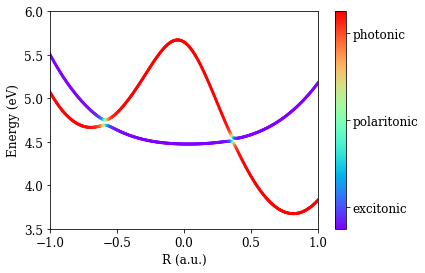

In [7]:



Hp = H_p(Hp, omc)
Hep = H_ep(Hep, gc)


for i in range(0,len(rlist)): ##len(rlist)):
    r = rlist[i]
    He = H_e(He, r)
    Htot = He + Hp + Hep
    tmpH = np.copy(Htot)
    ### Diagonalize here and store eigenvalues to vals, and eigenvectors to vecs
    vals, vecs = LA.eig(Htot)
    idx = vals.argsort()[::1]
    vals = vals[idx]
    vecs = vecs[:,idx]
    cvecs =np.conjugate(vecs)
    #print(vals)
    #print(vecs)
    #print(r)
    ### JJF Note: I don't think the np.sum is necessary; though it doesn't lead to the wrong answer, I just
    ### don't think it is necessary
    ### Also cvecs * vecs will be pure real, but the data type is 
    ### still complex (just with 0 imaginary component) so we take only
    ### the real part here to avoid warnings when we plot.
    PES_p[i,1] = np.real(cvecs[1,1] * vecs[1,1])
    PES_p[i,2] = np.real(cvecs[2,1] * vecs[2,1])
     
    
    ### Now vecs are ordered such that vecs[0,:] gives the ground-state
    ### vector, vecs[1,:] gives the first excited-state vector, etc
    ### and vecs[2,1] gives the coefficient of state |g>|1> that
    ### contributes to the second-excited state
    for j in range(0,4):
        PPES[i,j] = np.real(vals[j])
    
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('rainbow')
im = ax.scatter(rlist, 27.211*PPES[:,2], c=PES_p[:,2], cmap=cm, s=4) # rlist, 27.211*PPES[:,1], c=LP_p, cmap=cm )
im = ax.scatter(rlist, 27.211*PPES[:,1], c=PES_p[:,1], cmap=cm, s=4)
cbar = fig.colorbar(im, ticks=[0.1, 0.5, 0.9])
cbar.ax.set_yticklabels(['excitonic', 'polaritonic', 'photonic'])
plt.xlim(-1.,1.)
plt.ylim(3.5,6.)
plt.xlabel("R (a.u.)")
plt.ylabel("Energy (eV)")
#plt.savefig(filename)
plt.show()



**FIGEN NOTE:**  The code below uses the new *polaritonic* class, but the main concept is still the same. 
You can build the Hamiltonian at a variety of different values of $R$, then diagonalize the Hamiltonian, and then
get the energies that define the surface from the eigenvalues (stored in vals) and the photon contributions from the eigenvectors (stored in vecs).  The main difference now is that there are multiple states that have *photonic* contribution, state |g01> (stored in vecs[1,:]) state |g10> (stored in vecs[2,:]) and state |g11> (stored in vecs[3,:]), so unlike before where you just get conj(vecs[1,i])*vecs[1,i] for the photonic contribution to polartion surface $i$, you will take conj(vecs[1,i])*vecs[1,i] + conj(vecs[2,i])*vecs[2,i] + conj(vecs[3,i])*vecs[3,i]

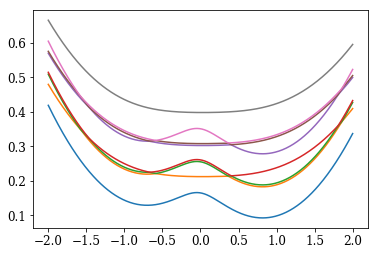

In [17]:
from polaritonic import polaritonic


options = {
        'Number_of_Photons': 2,
        'Photon_Energys': [2.45/27.211, 2.6/27.211],
        'Coupling_Strengths': [0.01/27.211, 0.01/27.211], 
        'Initial_Position': -0.678,
        'Initial_Velocity': -3.00e-5
        
        }

### Build basis and Hamiltonian matrices according to the above options
polt = polaritonic(options)

### create a list of r values
n_r_vals = 500
r_list = np.linspace(-2,2,n_r_vals)
### New array to store energy values for the different surfaces
PES_E = np.zeros((n_r_vals, polt.N_basis_states))
### New array to store the photonic contributions from the different surfaces
PES_P = np.zeros((n_r_vals, polt.N_basis_states))

for i in range(0,len(r_list)):
    ### change R attribute to current value of r in r_list
    polt.R = r_list[i]
    ### build electronic Hamiltonian for this particular value of R
    polt.H_e()
    ### now that electronic Hamiltonian is updated, build new total Hamiltonian
    polt.H_total = np.copy(polt.H_electronic + polt.H_photonic + polt.H_interaction)
    ### store H_total in a temporary array
    tmpH = np.copy(polt.H_total)
    ### Diagonalize here and store eigenvalues to vals, and eigenvectors to vecs
    vals, vecs = LA.eig(tmpH)
    idx = vals.argsort()[::1]
    vals = vals[idx]
    vecs = vecs[:,idx]
    cvecs =np.conjugate(vecs)
    
    for j in range(0,polt.N_basis_states):
        PES_E[i,j] = np.real(vals[j])
        

plt.plot(r_list, PES_E[:,0], label='phi0')
plt.plot(r_list, PES_E[:,1], label='phi1')
plt.plot(r_list, PES_E[:,2], label='phi2')
plt.plot(r_list, PES_E[:,3], label='phi3')
plt.plot(r_list, PES_E[:,4], label='phi4')
plt.plot(r_list, PES_E[:,5], label='phi5')
plt.plot(r_list, PES_E[:,6], label='phi6')
plt.plot(r_list, PES_E[:,7], label='phi7')
#plt.ylim(0,1.6)
#plt.legend()
plt.show()

    
    
    
    




In [ ]:
om1 = (2.18)/27.211 
om2 = (1.8)/27.211
### hbar g_c in atomic units
g1 = 0.136/27.211
g2 = 0.136/27.211
#g1 = 0.1/27.211
#g2 = 0.1/27.211
#g1 = 0
#g2 = 0
### form empty arrays for lower and upper polariton surface
P1 = np.zeros_like(rlist)
P2 = np.zeros_like(rlist)
P3 = np.zeros_like(rlist)
P4 = np.zeros_like(rlist)
P5 = np.zeros_like(rlist)
P6 = np.zeros_like(rlist)
P7 = np.zeros_like(rlist)
P8 = np.zeros_like(rlist)

Ht = np.zeros((8,8))

### Coupling for 2-mode light system couples <g| to |e> and either: 
Vec1 = np.zeros((8,3))
Vec1[0,:] = [0,0,1]
Vec1[1,:] = [0,1,0]
Vec1[2,:] = [0,1,1]
Vec1[3,:] = [1,0,0]
Vec1[4,:] = [1,0,1]
Vec1[5,:] = [0,1,1]

for i in range(0,6):
    for j in range(0,6):
        bra = np.copy(Vec1[i,:])
        ket = np.copy(Vec1[j,:])
        
        ### first see if we are coupling <g| to |e> or vice versa
        if bra[2] != ket[2]:
            if ((bra[0] != ket[0]) and (bra[1] == ket[1])):
                Ht[i,j] = g1
            elif ((bra[1] != ket[1]) and (bra[0] == ket[0])):
                Ht[i,j] = g2
print(Ht)
                  

for i in range(0,len(rlist)):
    r = rlist[i]
    PES = E_of_R(r)
    for j in range(0,6):
        ket = Vec1[j,:]
        Ht[j,j] = (ket[0]+1/2)*om1 + (ket[1]+1/2)*om2 + PES[int(ket[2])]
        tmpH = np.copy(Ht)
        vals, vecs = LA.eig(Ht)
        idx = vals.argsort()[::1]
        vals = vals[idx]
        P1[i] = vals[0]
        P2[i] = vals[1]
        P3[i] = vals[2]
        P4[i] = vals[3]
        P5[i] = vals[4]
        P6[i] = vals[5]

        
plt.plot(rlist, 27.211*P1, 'red')
plt.plot(rlist, 27.211*P2, 'orange')
plt.plot(rlist, 27.211*P3, 'yellow')
plt.plot(rlist, 27.211*P4, 'green')
plt.plot(rlist, 27.211*P5, 'blue')
plt.plot(rlist, 27.211*P6, 'purple')
### form spline for LP surface
UP2_spline = InterpolatedUnivariateSpline(rlist, P6, k=3)
FUP2_spline = UP2_spline.derivative()

### form spline for excited-state surface
LP2_spline = InterpolatedUnivariateSpline(rlist, P5, k=3)
FLP2_spline = LP2_spline.derivative()
plt.xlim(-1.5,1.5)
#plt.ylim(2,5.5)
plt.show()



In [ ]:
v2_of_t = np.zeros(N_time)
r2_of_t = np.zeros(N_time)
ri = -0.7
vi = 0.00012
for i in range(0,N_time):
    time[i] = i*dt
    res = VelocityVerlet(FLP2_spline, FUP2_spline, c_g, c_e, M, ri, vi, dt)
    ri = res[0]
    vi = res[1]
    r2_of_t[i] = ri
    v2_of_t[i] = vi
au_to_ps = 2.418e-5
plt.plot(time*au_to_ps, r2_of_t, 'red', label='SMA')
plt.plot(time*au_to_ps, r_of_t, 'blue', label='Cavity')
#plt.ylim(-0.8,0)
plt.legend()
plt.show()